## Escalado de atributos: Z-Score Standardization y Min-Max Scaling 

### Sobre estandardización

El resultado de la **estandardización** (o **normalización Z-score**) es obtener los datos reformulados como una distribución normal con características

$\mu = 0$ y $\sigma = 1$

donde $\mu$ es la media (mean) y $\sigma$ representa la desviación estándar de la media; unidad tipificada (también llamada unidad ***z***) de las muestras se obtienen:

$$z = \frac{x - \mu}{\sigma}$$

Normalizar las características para que estén centradas alrededor de 0 con una desviación estándar de 1 no sólo es importante si comparamos medidas que tienen unidades diferentes, sino que también es un requisito general para muchos algoritmos de aprendizaje automático. Intuitivamente, podemos pensar en el descenso de gradiente como un ejemplo destacado (un algoritmo de optimización utilizado a menudo en regresión logística, SVM, perceptrones, redes neuronales, etc.); con características en diferentes escalas, ciertos pesos pueden actualizarse más rápido que otros, ya que los valores de las características $x_j$ desempeñan un papel en las actualizaciones de los pesos.

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

de modo que

$$w_j := w_j + \Delta w_j,$$
donde $\eta$ es la tasa de aprendizaje, $t$ la etiqueta de la clase objetivo, y $o$ la salida real.
Otros ejemplos intuitivos son los algoritmos K-Nearest Neighbor y los algoritmos de agrupación que utilizan, por ejemplo, medidas de distancia euclidiana; de hecho, los clasificadores basados en árboles son probablemente los únicos clasificadores en los que el escalado de características no supone ninguna diferencia.

De la documentación oficial [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

*"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."*

### Sobre Min-Max scaling

Un enfoque alternativo a la normalización (o estandarización) de la puntuación Z es el llamado **escalado Mín-Máx** (a menudo también llamado simplemente "normalización", una causa común de ambigüedades).  
En este enfoque, los datos se escalan a un intervalo fijo, normalmente de 0 a 1. El coste de tener este intervalo limitado es que los datos se escalan a un intervalo fijo.  
El coste de tener este rango acotado -en contraste con la normalización- es que acabaremos con desviaciones estándar más pequeñas, lo que puede suprimir el efecto de los valores atípicos.

Un escalado Mín-Máx se realiza normalmente mediante la siguiente ecuación:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

<br>
<br>

### ¿Estandarización de puntuaciones Z o escalado Mín-Máx?

"¿Estandarización o escalado Min-Max?" - No hay una respuesta obvia a esta pregunta: realmente depende de la aplicación. 

Por ejemplo, en los análisis de agrupamiento, la normalización puede ser especialmente crucial para comparar similitudes entre características basadas en determinadas medidas de distancia. Otro ejemplo destacado es el análisis de componentes principales, en el que solemos preferir la normalización al escalado Min-Max, ya que nos interesan los componentes que maximizan la varianza (dependiendo de la pregunta y de si el PCA calcula los componentes a través de la matriz de correlaciones en lugar de la matriz de covarianzas).

Sin embargo, ¡esto no significa que el escalado Min-Max no sea útil en absoluto! Una aplicación popular es el procesamiento de imágenes, donde las intensidades de los píxeles tienen que normalizarse para ajustarse a un cierto rango (es decir, de 0 a 255 para la gama de colores RGB). Además, los algoritmos típicos de redes neuronales requieren datos en una escala de 0 a 1.

## Estandarización y normalización: cómo hacerlo con scikit-learn

Por supuesto, podríamos hacer uso de las capacidades de vectorización de NumPy para calcular las puntuaciones z para la normalización y para normalizar los datos utilizando las ecuaciones que se mencionaron en las secciones anteriores. Sin embargo, hay un enfoque aún más conveniente utilizando el módulo de preprocesamiento de una de las bibliotecas de aprendizaje automático de código abierto de Python [scikit-learn](http://scikit-learn.org ).

Para los siguientes ejemplos y debates, utilizaremos el conjunto de datos gratuito "Wine" depositado en el repositorio de aprendizaje automático de la UCI  
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

El conjunto de datos Vino consta de 3 clases diferentes, en las que cada fila corresponde a una muestra de vino concreta.

Las etiquetas de clase (1, 2, 3) figuran en la primera columna, y las columnas 2-14 corresponden a 13 atributos (características) diferentes:

1) Alcohol  
2) Ácido málico  
...

In [1]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [3]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


Como podemos ver en la tabla anterior, las características **Alcohol** (porcentaje/volumen) y **Ácido málico** (g/l) se miden en escalas diferentes, por lo que ***Escalado de características*** es necesario importante antes de cualquier comparación o combinación de estos datos.  

#### Estandarización y Min-Max scaling

In [4]:
df[['Alcohol', 'Malic acid']].describe().loc[['mean', 'std']]

,Alcohol,Malic acid
mean,13.000618,2.336348
std,0.811827,1.117146


In [5]:
df[['Alcohol', 'Malic acid']].describe().loc[['min', 'max']]

,Alcohol,Malic acid
min,11.03,0.74
max,14.83,5.80


In [6]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [7]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [8]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

      
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [9]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


#### Visualizando

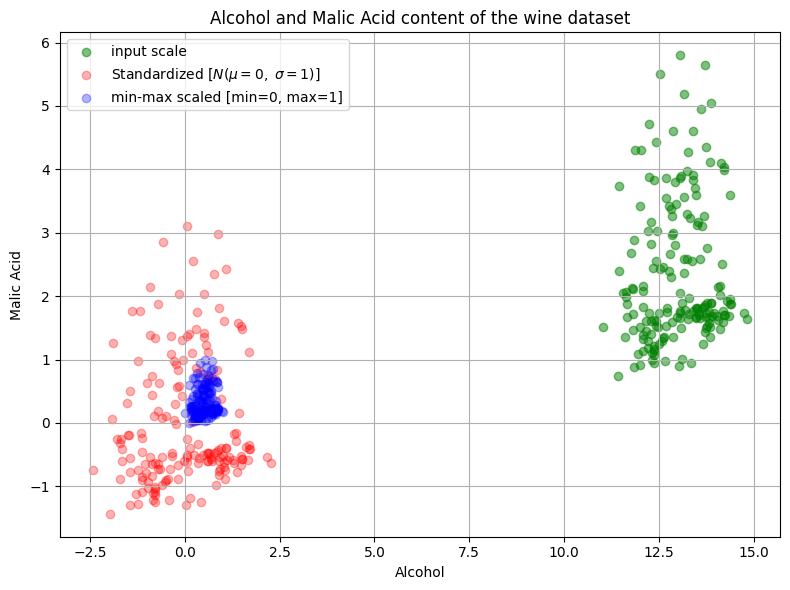

In [10]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

El gráfico anterior incluye los puntos de datos del vino en las tres escalas diferentes: la escala de entrada en la que se midió el contenido de alcohol en volumen-porcentaje (verde), las características normalizadas (rojo) y las características normalizadas (azul).
En el siguiente gráfico, ampliaremos los tres ejes-escalas.

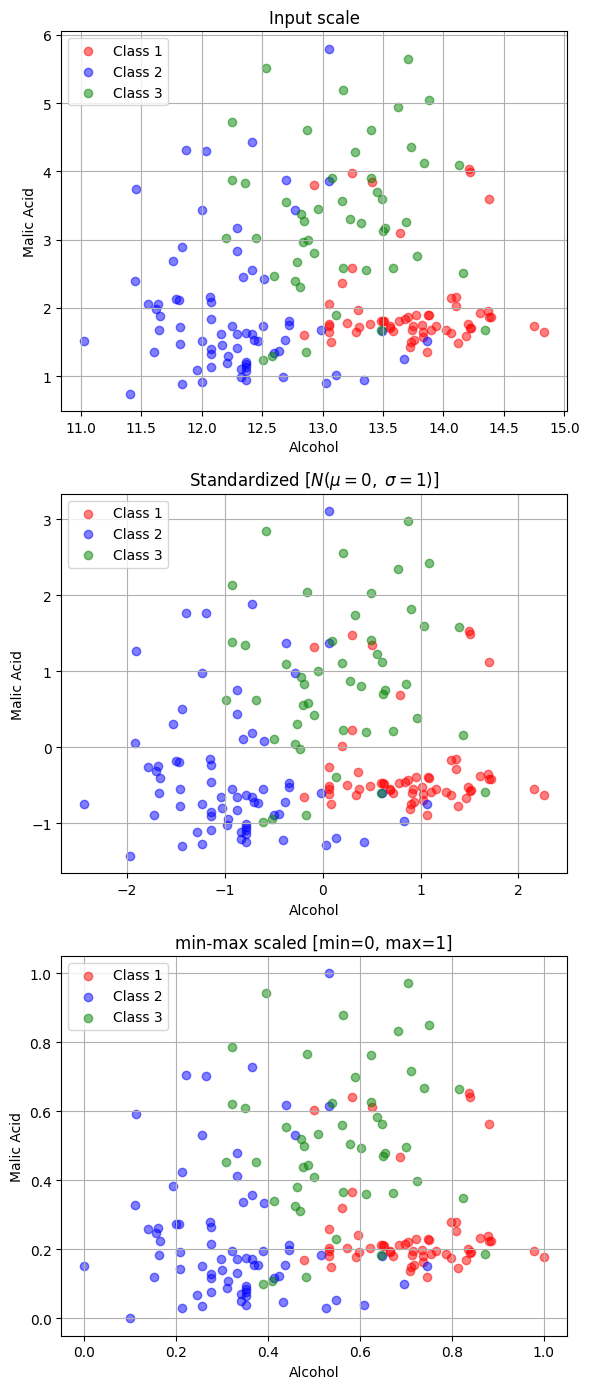

In [11]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

### A distintas escalas

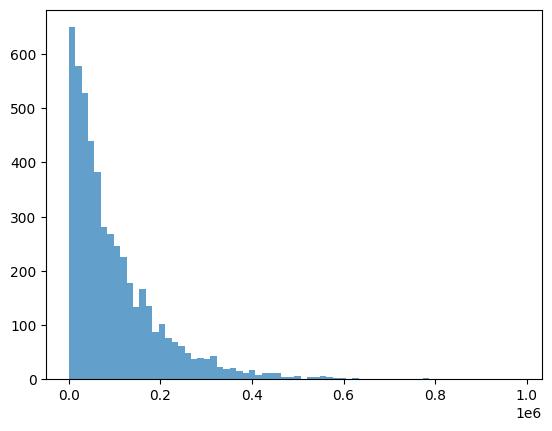

In [12]:
from scipy import stats

price_madrid = stats.gamma.rvs(1, size=5000)*100000

plt.hist(price_madrid, 70, histtype="stepfilled", alpha=.7);

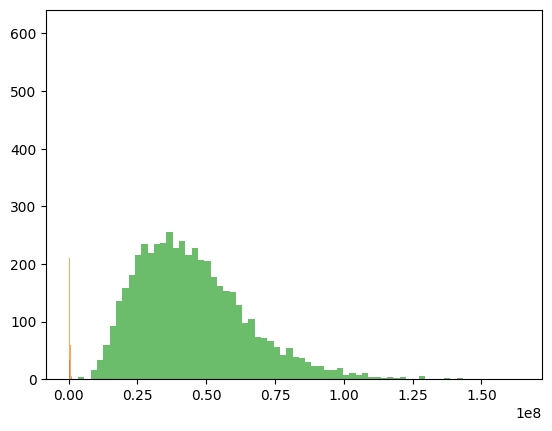

In [13]:
# Precios de casas en diferentes monedas
from scipy import stats
import matplotlib.pyplot as plt

price_madrid = stats.gamma.rvs(1, size=5000)*100000
price_london = stats.gamma(5).rvs(5000)*100000*0.87
price_spetesbourg = stats.gamma(5).rvs(5000)*100000*90.23

plt.hist(price_madrid, 70, alpha = .7)
plt.hist(price_london, 70, alpha = .7)
plt.hist(price_spetesbourg, 70, alpha = .7);

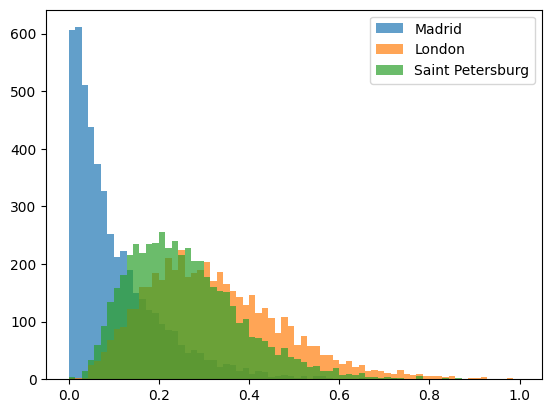

In [14]:
df = pd.DataFrame({'Madrid': price_madrid,
                  'London': price_london,
                  'Saint Petersburg': price_spetesbourg})

minmax_scale = preprocessing.MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)

plt.hist(df_minmax[:, 0], 70, histtype="stepfilled", alpha=.7, label='Madrid')
plt.hist(df_minmax[:, 1], 70, histtype="stepfilled", alpha=.7, label='London')
plt.hist(df_minmax[:, 2], 70, histtype="stepfilled", alpha=.7, label='Saint Petersburg')
plt.legend();

## Aproximaciones Bottom-up

Por supuesto, también podemos codificar las ecuaciones para la estandarización y el escalado 0-1 Min-Max "manualmente". Sin embargo, los métodos de scikit-learn siguen siendo útiles si estamos trabajando con conjuntos de datos de prueba y de entrenamiento y queremos escalarlos por igual.

Ej, 
<pre>
std_scale = preprocessing.StandardScaler().fit(X_train)
X_entrenamiento = std_scale.transform(X_entrenamiento)
X_test = std_scale.transform(X_test)
</pre>

A continuación, realizaremos los cálculos usando código Python "puro", y una solución NumPy más conveniente, que es especialmente útil si intentamos transformar una matriz entera.

Sólo para recordar las ecuaciones que estamos utilizando:

Normalización: 

$$
z = \frac{x - \mu}{\sigma}
$$

con media:  

$$
\begin{equation}\mu = \frac{1}{N} \sum_{i=1}^N (x_i)\end{equation}
$$

y desviación típica:  

$$
\begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_i=1}^N (x_i - \mu)^2 \end{equation}
$$

Escala Min-Max: $\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}$

In [15]:
# Standardization

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

# Min-Max scaling

minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

### NumPy

In [16]:
import numpy as np

# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

### Visualization

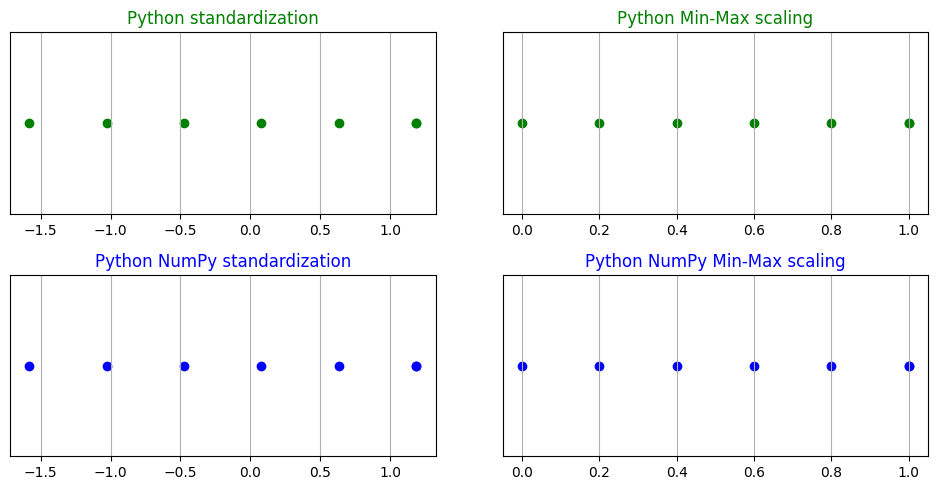

In [17]:
from matplotlib import pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')
    
plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

# Discretizado

In [29]:
import pandas as pd

fcc_survey_df = pd.read_csv('data/2016-FCC-New-Coders-Survey-Data.csv', encoding='utf-8')
fcc_survey_df = fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']]
fcc_survey_df.head()

/tmp/ipykernel_101660/125793488.py:3: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  fcc_survey_df = pd.read_csv('data/2016-FCC-New-Coders-Survey-Data.csv', encoding='utf-8')


,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## De tamaño fijo

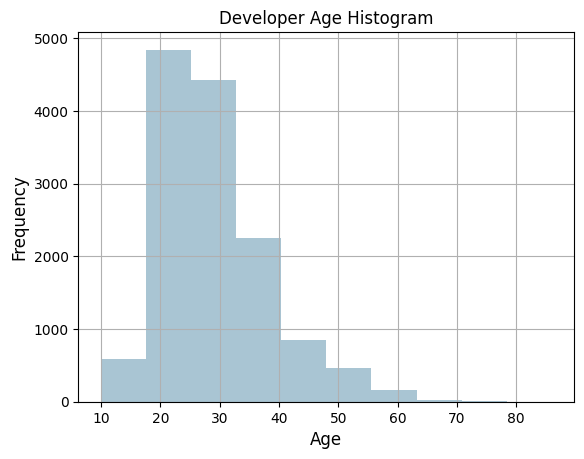

In [30]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

### Basado en redondeo

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [31]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0


### Rangos custom

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [32]:
fcc_survey_df['Age'].unique()

array([28., 22., 19., 26., 20., 34., 23., 35., 33., 57., 47., nan, 31.,
       27., 29., 30., 25., 44., 21., 24., 18., 39., 43., 40., 32., 16.,
       38., 15., 36., 14., 50., 37., 49., 45., 51., 17., 52., 46., 56.,
       42., 65., 53., 48., 75., 59., 61., 80., 62., 54., 41., 58., 12.,
       11., 13., 60., 64., 70., 73., 69., 55., 71., 63., 66., 86., 10.,
       67., 72., 68.])

In [36]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,16a328da44ceb840863031f35dd3923e,22.0,2.0,"(15, 30]",2
1072,54bda0adcf9aa98fa0b3f9b5f608c851,21.0,2.0,"(15, 30]",2
1073,0c74ada07ff4ea3f1bf48b4fd79159f9,40.0,4.0,"(30, 45]",3
1074,87f04e2ef23e2c517c73e438da1867b1,34.0,3.0,"(30, 45]",3
1075,7a2c672065d3802525c733efc1b16219,29.0,2.0,"(15, 30]",2


In [37]:
def bin_ages(x):
    if x >= 0 and x <=15:
        return 1
    
    return 0

fcc_survey_df['Age_bin_custom_label'] = fcc_survey_df['Age'].apply(bin_ages)

In [39]:
fcc_survey_df['Age_bin_custom_label'].value_counts()

Age_bin_custom_label
0    15386
1      234
Name: count, dtype: int64